## Importações

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder ## pre-processamento de variáveis categóricas
from sklearn.preprocessing import MinMaxScaler  ## pre-processamento de variáveis numéricas

from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn import set_config
set_config(display="diagram")

## Titanic Challenge
___

The main purpose of this challenge is to introduce users to their first classification problem. Using the data science process we will:

1. Business Understanding
   
2. Data Understanding

3. Data preparation

4. Modeling

5. Evaluation

6. Submission

#### Business Understanding
___

Hypothetical situation:

I was just hired for a data scientist job at a huge naval construction company. The company is called 'Iceberg' and they're going to make a real life functioning Titanic replica, my boss asked me to find the data from the original Titanic and usa machine learning to help him prepare for the worst. The main question was :

> "If our replica falls into the same situation as the original titanic, is there any way to predict who is going to survive?".

RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of April 15, 1912 after striking an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking one of modern history's deadliest peacetime commercial marine disasters ... The final survivor of the sinking, Millvina Dean, aged two months at the time, died in 2009 at the age of 97 [1].

[1] https://en.wikipedia.org/wiki/RMS_Titanic

#### Reading the data
___

In [5]:
train = pd.read_csv('../data/titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test = pd.read_csv('../data/titanic_test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Exploring the data
___

 - dependent variable : 'Survived'
 - indepent variables : 'PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'

In [7]:
print(train.shape)
train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

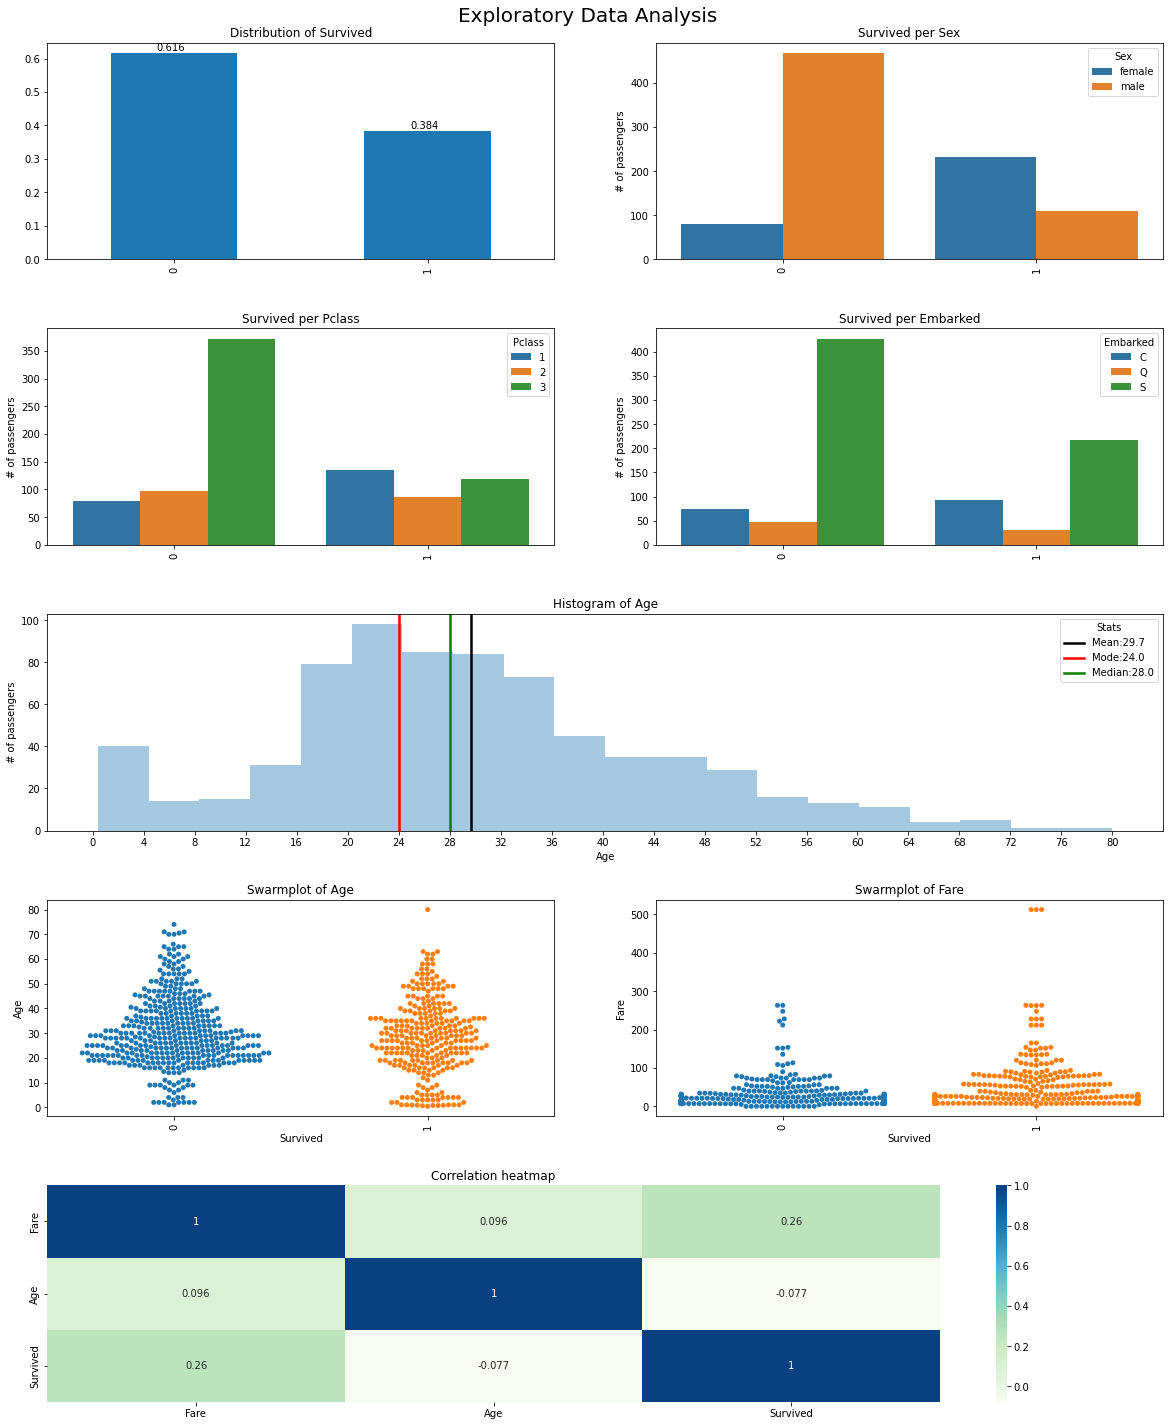

In [14]:
# defining the canvas and the subplots

fig = plt.figure(figsize=(20,25))
fig.suptitle('Exploratory Data Analysis',y=0.9,fontsize=20)
grid = plt.GridSpec(5,2, wspace= 0.2,hspace=0.32)

ax0 = plt.subplot(grid[0,0])
ax1 = plt.subplot(grid[0,1])
ax2 = plt.subplot(grid[1,0])
ax3 = plt.subplot(grid[1,1])
ax4 = plt.subplot(grid[2,:])
ax5 = plt.subplot(grid[3,0])
ax6 = plt.subplot(grid[3,1])
ax7 = plt.subplot(grid[4,:])



# distribution of survived
data = train.Survived.value_counts(normalize=True)
data.plot(kind='bar',ax=ax0)
ax0.set_title('Distribution of Survived')
ax0.text(x=-0.07,y=data[0]+0.008,s=f'{data[0]:.3f}')
ax0.text(x=0.93,y=data[1]+0.008,s=f'{data[1]:.3f}')



# dist survived per sex
data_sex = train[['PassengerId','Sex','Survived']].groupby(['Sex','Survived'],as_index=False).count()
sns.barplot(x='Survived',y='PassengerId',hue='Sex',data=data_sex,ax=ax1)
ax1.set_title('Survived per Sex')
ax1.set_xticklabels(labels=ax1.get_xticklabels(),rotation='vertical')
ax1.set_xlabel('')
ax1.set_ylabel('# of passengers')



# histogram of ages
data_age = train[train['Age'].notna()].Age
data_age_mean = data_age.mean()
data_age_mode = statistics.mode(data_age)
data_age_median = data_age.median()
sns.distplot(data_age,ax=ax4,kde=False)

ax4.set_ylabel('# of passengers')
ax4.set_title('Histogram of Age')
ax4.axvline(data_age_mean,ls='-',lw=2.5,c='black')
ax4.axvline(data_age_mode,ls='-',lw=2.5,c='red')
ax4.axvline(data_age_median,ls='-',lw=2.5,c='green')
ax4.legend((f'Mean:{data_age_mean:.1f}',f'Mode:{data_age_mode:.1f}',f'Median:{data_age_median:.1f}'),title='Stats')
ax4.set_xticks(range(0,84,4))



# distribution of embarked
data_embarked = train[['PassengerId','Embarked','Survived']].groupby(['Embarked','Survived'],as_index=False).count()
sns.barplot(x='Survived',y='PassengerId',hue='Embarked',data=data_embarked,ax=ax3)
ax3.set_title('Survived per Embarked')
ax3.set_xticklabels(labels=ax3.get_xticklabels(),rotation='vertical')
ax3.set_xlabel('')
ax3.set_ylabel('# of passengers');



# distribution of embarked
data_class = train[['PassengerId','Pclass','Survived']].groupby(['Pclass','Survived'],as_index=False).count()
sns.barplot(x='Survived',y='PassengerId',hue='Pclass',data=data_class,ax=ax2)
ax2.set_title('Survived per Pclass')
ax2.set_xticklabels(labels=ax2.get_xticklabels(),rotation='vertical')
ax2.set_xlabel('')
ax2.set_ylabel('# of passengers');



# swarmplot of fare
sns.swarmplot(y=train.Fare,x=train.Survived,ax=ax6)
ax6.set_title('Swarmplot of Fare');
ax6.set_xticklabels(labels=ax6.get_xticklabels(),rotation='vertical')


# swarmplot of age
sns.swarmplot(y=train.Age,x=train.Survived,ax=ax5)
ax5.set_title('Swarmplot of Age');
ax5.set_xticklabels(labels=ax6.get_xticklabels(),rotation='vertical')


# heatmap correlation of Fare,Survived and Age
sns.heatmap(train[['Fare','Age','Survived']].corr(),cmap='GnBu',annot=True,ax=ax7,)
ax7.set_title('Correlation heatmap');

In [15]:
## verifying the number of null values

train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Data preparation
___
- Deal with null values
- Remove unused columns
- Feature engineering
- Feature Scaling
- Feature Encoding
 
Strategy: define pipelines and functions to automate the model evaluation phase

In [21]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [23]:
pipe_var_cat = make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder())
pipe_var_num = make_pipeline(SimpleImputer(strategy='mean'),MinMaxScaler())

In [48]:
col_transf = make_column_transformer((pipe_var_cat,['Pclass','Embarked','Sex']),(pipe_var_num,['Age','Fare']))

In [52]:
col_transf

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['Pclass', 'Embarked', 'Sex']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['Age', 'Fare'])])

#### Modeling
___
- LogisticRegression
- DecisionTreeClassifier
- SVC

In [62]:
modelos = [LogisticRegression(random_state=42),
           DecisionTreeClassifier(max_depth=5,min_samples_leaf=30,random_state=42),
           DecisionTreeClassifier(max_depth=10,min_samples_leaf=10,random_state=42),
           SVC(degree=4,probability=True,random_state=42)]

x_train, x_test, y_train, y_test = train_test_split(train,
                                                    train.Survived,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=train.Survived)

In [63]:
acc = []

for modelo in modelos:
    pipe_final = make_pipeline(col_transf,modelo)
    pipe_final.fit(x_train,y_train)
    y_pred = pipe_final.predict(x_test)
    acc.append(accuracy_score(y_test,y_pred))

In [64]:
acc

[0.7653631284916201, 0.776536312849162, 0.7653631284916201, 0.7932960893854749]

In [66]:
pipe_final = make_pipeline(col_transf,modelos[-1])
pipe_final.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Pclass', 'Embarked',
                                                   'Sex']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Fare'])])),
                ('svc', SVC(degree=4, probability=True, random_state=42))])

#### Evaluation
___
- Confusion Matrix

              precision    recall  f1-score   support

           0       0.77      0.95      0.85       110
           1       0.86      0.55      0.67        69

    accuracy                           0.79       179
   macro avg       0.82      0.75      0.76       179
weighted avg       0.81      0.79      0.78       179



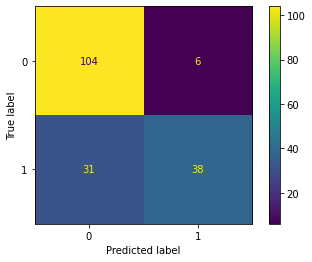

In [75]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

y_pred = pipe_final.predict(x_test)

plot_confusion_matrix(pipe_final,x_test,y_test)
print(classification_report(y_test,y_pred))

In [77]:
104/(104+6)

0.9454545454545454